In [1]:
import pandas as pd
from siuba import *
import numpy as np

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 1000)

In [3]:
df= pd.read_parquet("dla_df.parquet")

In [217]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested
10714,Obligated,ER,4400(042),Humboldt County,2014-09-30,2014-10-09,2014-10-10,2014-10-10,2014-10-10,-22927.76,0.0,-25898.68,Authorized,5904,1.0,E-76 approved on E-76 approved on,9.0,1.0,0.0,nan,Alderpoint Road Pm 27.35 To 27.35,Emergency Relief Pr Only,4.0,NaT,NaT,NON-MPO,4400,2014.0,Humboldt County,-29643.825861,-26243.288261,0.0


In [179]:
"""
from Tiffany's new-metrics notebook
"""

ACTIVE_TRANSPORTATION = ['bike', 'bicycle', 'cyclist', 
                         'pedestrian', 
                         ## including the spelling errors of `pedestrian`
                         'pedestrain',
                         'crosswalk', 
                         'bulb out', 'bulb-out', 
                         'active transp', 'traffic reduction', 
                         'speed reduction', 'ped', 'srts', 
                         'safe routes to school',
                         'sidewalk', 'side walk', 'Cl ', 'trail'
                        ]
TRANSIT = ['bus', 'metro', 'station', #Station comes up a few times as a charging station and also as a train station
           'transit','fare', 'brt', 'yarts', 'rail']
BRIDGE = ["bridge", 'viaduct']
STREET = ['traffic signal', 'resurface', 'resurfacing', 'slurry', 'seal' 
          'sign', 'stripe', 'striping', 'median', 
          'guard rail', 'guardrail', 
          'road', 'street', 
          'sinkhole', 'intersection', 'signal', 'curb',
          'light', 'tree', 'pavement', 'roundabout'
         ]

FREEWAY = ['hov ', 'hot ', 'freeway', 'highway', 'express lanes', 'hwy']


INFRA_RESILIENCY_ER = ['repair', 'emergency', 'replace','retrofit', 'er',
                       'rehab', 'improvements', 'seismic', 'reconstruct', 'restoration']

CONGESTION_RELIEF = ['congestion', 'rideshare','ridesharing', 'vanpool', 'car share']

def categorize_project_descriptions(row):
    """
    This function takes a individual type of work description (row of a dataframe)
    and returns a dummy flag of 1 if it finds keyword present in
    project categories (active transportation, transit, bridge, etc).
    A description can contain multiple keywords across categories.
    """
    # Make lowercase
    description = row.type_of_work.lower()
    
    # Store a bunch of columns that will be flagged
    # A project can involve multiple things...also, not sure what's in the descriptions
    active_transp = 0
    transit = 0
    bridge = 0
    street = 0
    freeway = 0
    infra_resiliency_er = 0
    congestion_relief = 0
    
    if any(word in description for word in ACTIVE_TRANSPORTATION):
        active_transp = 1
    if any(word in description for word in TRANSIT):
        transit = 1
    if any(word in description for word in BRIDGE):
        bridge = 1
    if any(word in description for word in STREET):
        street = 1
    if any(word in description for word in FREEWAY):
        freeway = 1 
    if any(word in description for word in INFRA_RESILIENCY_ER):
        infra_resiliency_er = 1
    if any(word in description for word in CONGESTION_RELIEF):
        congestion_relief = 1    
        
        
    return pd.Series(
        [active_transp, transit, bridge, street, freeway, infra_resiliency_er, congestion_relief], 
        index=['active_transp', 'transit', 'bridge', 'street', 
               'freeway', 'infra_resiliency_er', 'congestion_relief']
    )
   

    

In [180]:
df.type_of_work.unique()

array(['Bridge Preventive Maintenance - Deck Joints',
       'Permanent Restoration',
       'Create A Smart Growth Corridor With Barrier Separated Bicycle Lanes,',
       ..., 'Purchase (2) Class H Vehicles', 'Guardrail Var. Locations',
       'Low-floor Light Rail Transit Vehicles'], dtype=object)

In [181]:
df>>select(_.primary_agency_name, _.type_of_work)>>arrange(-_.type_of_work)

,primary_agency_name,type_of_work
8886,El Dorado County,_const. Class I Bike Trail
14133,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
14527,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
4239,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
6341,Yosemite Area Regional Transportation System JPA,Yosemite Area Regional Transportation System (yarts) Public Outreach And
...,...,...
3827,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
5783,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
14543,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"
18485,Garden Grove,"""first Mile"" Bicycle And Pedestrian Trail Expansion (tc)"


In [182]:
df>>filter(_.type_of_work.isnull())

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested


In [183]:
work_categories = df.apply(categorize_project_descriptions, axis=1)

In [184]:
df2 = pd.concat([df, work_categories], axis=1)

In [185]:
work_cols = list(work_categories.columns)
print(work_cols)

df2 = df2.assign(
    work_categories = df2[work_cols].sum(axis=1)
)

df2.work_categories.value_counts()

['active_transp', 'transit', 'bridge', 'street', 'freeway', 'infra_resiliency_er', 'congestion_relief']


1    8811
2    8675
0    1880
3    1423
4      68
5       7
Name: work_categories, dtype: int64

In [186]:
list(df2[df2.work_categories==3].type_of_work.unique())

['Installing A Class Iii Bike Route, Reconstruct Asphalt Pavement, Ada Compliant',
 'Curb, Gutter, Sidewalk, And Ada-compliant Curb Ramps',
 'Install Controller Access Medians, Signal Upgrades And Pedestrian Refuges.',
 'Rehab Pavement And Restripe With Bike Lanes',
 'Install Bike Lanes,signing & Striping, Pvmnt Rehab',
 'Asphalt Concrete Overlay(resurface Existing Roadway With Hot Mix Asphalt)',
 'Bridge Railing Replacement',
 'Asphalt Concrete Roads, Bike Lanes, Evaluate And Revise Intersection',
 'Road Rehab,install Handicap Ramps,sidewalk,curb,construct Raised',
 'Construct Sidewalk, Curb & Gutter. (tc)',
 'Construct New Sidewalks, Curbs And Gutters, Class Ii Bicycle Lanes(tc)',
 'Sidewalk Gap Closures, Curb And Gutter, And Drainage Facilities (tc)',
 '(eo) Remove Large Tree From Pier #3, Pile Cap #4. Closed Nb Lane Of Bridge',
 'Rehabilitate Pavement And Implement Bike/ped Improvements',
 'Permanent Restoration - Replace Guardrail',
 'Install Cycle Track, Parking Protect Bikeways 

In [187]:
df2.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.0,0.00,Authorized,5904,1.0,E-76 approved on,NaN,0.0,9.0,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3.0,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County,0.000000e+00,0.000000,0.000000e+00,0,0,1,0,0,0,0,1
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.0,13000.00,Authorized,5910,1.0,E-76 approved on,1.0,1.0,7.0,nan,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3.0,2018-12-17,2018-12-18,NON-MPO,32D0,2018.0,Mendocino County,1.402833e+04,12418.310404,0.000000e+00,0,0,0,0,0,1,0,1
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.0,51394.58,Authorized,5904,1.0,E-76 approved on,14.0,0.0,6.0,nan,Mattole Rd Pm 43.17,Permanent Restoration,5.0,2018-12-06,2018-12-07,NON-MPO,4820,2018.0,Humboldt County,5.546001e+04,49098.770661,0.000000e+00,0,0,0,0,0,1,0,1
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.0,247002.00,Authorized,5924,3.0,E-76 approved on,4.0,16.0,0.0,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,"Create A Smart Growth Corridor With Barrier Separated Bicycle Lanes,",1.0,2018-12-07,2018-12-07,SACOG,5924,2018.0,Sacramento County,2.665405e+05,223376.354724,0.000000e+00,1,0,0,0,0,1,0,2
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.0,5702041.00,Authorized,5924,3.0,E-76 approved on,7.0,16.0,0.0,SAC24753,"Florin Rd Between Power Inn Rd. And Florin Perkins Rd, Phase 2",Streetscape (tc),3.0,2018-11-28,2018-12-04,SACOG,5924,2018.0,Sacramento County,6.153086e+06,0.000000,6.130295e+06,0,0,0,1,0,0,0,1


In [188]:
work_cols = list(work_categories.columns)
print(work_cols)

df2 = df2.assign(
    work_categories = df2[work_cols].sum(axis=1)
)

df2.work_categories.value_counts()

['active_transp', 'transit', 'bridge', 'street', 'freeway', 'infra_resiliency_er', 'congestion_relief']


1    8811
2    8675
0    1880
3    1423
4      68
5       7
Name: work_categories, dtype: int64

In [189]:
# list out descriptions where it's still zero keywords flagged
list(df2[df2.work_categories==0].type_of_work.unique())

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [218]:
len(df2[df2.work_categories==0].type_of_work.unique())

850

In [223]:
(len(df2>>filter(_.work_categories==0)))

1880

In [226]:
print(f'{(((len(df2>>filter(_.work_categories==0))))/len(df2))*100}% of obligations not included in Project Categorties')

9.010736196319018% of obligations not included in Project Categorties


In [193]:
none = (df2>>filter(_.work_categories==0))

In [194]:
none.sample(5)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
10189,Obligated,STPL,6085(053),Sacramento Area Council Of Governments,2015-01-02,2015-01-02,2015-01-02,2015-01-02,2015-01-06,0.0,0.0,0.00,Authorized,6085,3.0,E-76 approved on E-76 approved on,0.0,0.0,4.0,VAR79046,"Six County (sacramento, Sutter, Yuba, Yolo, Placer, And El Dorado)",Mtp/scs 2035 Implementation (tc),2.0,NaT,NaT,SACOG,6085,2015.0,Sacramento Area Council of Governments,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0
13067,Obligated,BPMP,5904(175),Humboldt County,2019-03-14,2019-03-14,2019-03-19,2019-03-20,2019-03-22,237000.0,0.0,237000.00,Authorized,5904,1.0,E-76 approved on,1.0,6.0,2.0,HBP_Plans,Humboldt County Various Bridges,Develop A Bpmp Plan (tc),1.0,2019-03-13,2019-03-13,NON-MPO,5904,2019.0,Humboldt County,251195.130141,251195.130141,0.0,0,0,0,0,0,0,0,0
9352,Obligated,HP21L,6303(020),Sgvc,2015-04-28,2015-04-28,2015-04-28,2015-04-28,2015-05-02,0.0,0.0,0.00,Authorized,nan,7.0,E-76 approved on E-76 approved on,0.0,0.0,4.0,nan,On Uprr At Sunset Avenue In City Of Industry,Construct Grade Separation,4.0,NaT,NaT,SCAG,6303,2015.0,San Gabriel Valley Council of Governments,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0
9440,Obligated,HP21L,6303(020),Sgvc,2015-03-23,2015-03-23,2015-04-17,2015-04-17,2015-04-22,0.0,0.0,548539.92,Authorized,nan,7.0,E-76 approved on E-76 approved on,0.0,25.0,5.0,nan,On Uprr At Sunset Avenue In City Of Industry,Construct Grade Separation,3.0,NaT,NaT,SCAG,6303,2015.0,San Gabriel Valley Council of Governments,627118.991981,0.000000,0.0,0,0,0,0,0,0,0,0
14242,Obligated,CML,5059(198),Modesto,2019-05-13,2019-05-13,2019-05-13,2019-05-13,2019-05-15,0.0,0.0,0.00,Authorized,5059,10.0,E-76 approved on,12.0,0.0,2.0,VA01,Wb D Street To Nb 9th Street (sr 132),Install Right Turn Lane (tc),10.0,2019-05-01,2019-05-03,STANCOG,5059,2019.0,Modesto,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0


## Groupings

In [260]:
#heatmap help from towards_data_science: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

In [239]:
# groups = (df2.groupby(['active_transp', 'transit', 'bridge',
#                      'street','freeway','infra_resiliency_er', 'congestion_relief', ])
#                .agg({'adjusted_total_requested':'mean'}).reset_index())

In [265]:
import seaborn as sns
from shared_utils import calitp_color_palette as cp

In [242]:
sum_groups = (df2.groupby(['prepared_y'])
               .agg({'active_transp':'sum', 'transit':'sum', 'bridge':'sum',
                      'street':'sum','freeway':'sum','infra_resiliency_er':'sum',
                     'congestion_relief':'sum'}).reset_index())

In [249]:
sum_groups.set_index('prepared_y', inplace=True)

In [250]:
sum_groups

,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief
prepared_y,,,,,,,
2010.0,0,0,0,1,0,0,0
2011.0,0,0,1,3,1,2,0
2012.0,4,0,0,2,0,0,0
2013.0,39,11,36,58,2,102,0
2014.0,631,118,431,1045,12,1487,14
2015.0,600,118,455,924,23,1427,16
2016.0,606,128,459,952,52,1360,19
2017.0,599,119,420,976,25,1363,19
2018.0,576,148,423,1142,22,1781,28


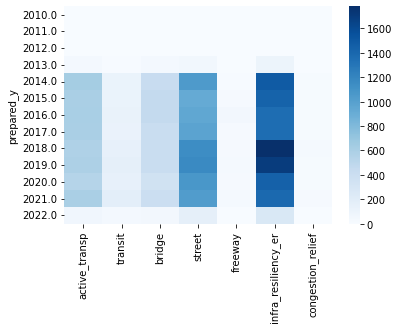

In [254]:
ax = sns.heatmap(sum_groups, cmap="Blues")

In [255]:
df_corr = sum_groups.corr()

In [256]:
df_corr

,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief
active_transp,1.000000,0.954257,0.996292,0.984472,0.827256,0.979728,0.927876
transit,0.954257,1.000000,0.940052,0.978012,0.826955,0.966937,0.949311
bridge,0.996292,0.940052,1.000000,0.975501,0.843388,0.976707,0.923776
street,0.984472,0.978012,0.975501,1.000000,0.800513,0.995885,0.940751
freeway,0.827256,0.826955,0.843388,0.800513,1.000000,0.789025,0.813511
infra_resiliency_er,0.979728,0.966937,0.976707,0.995885,0.789025,1.000000,0.942256
congestion_relief,0.927876,0.949311,0.923776,0.940751,0.813511,0.942256,1.000000


In [258]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

/tmp/ipykernel_957/3020399775.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


In [259]:
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

/tmp/ipykernel_957/3713700341.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


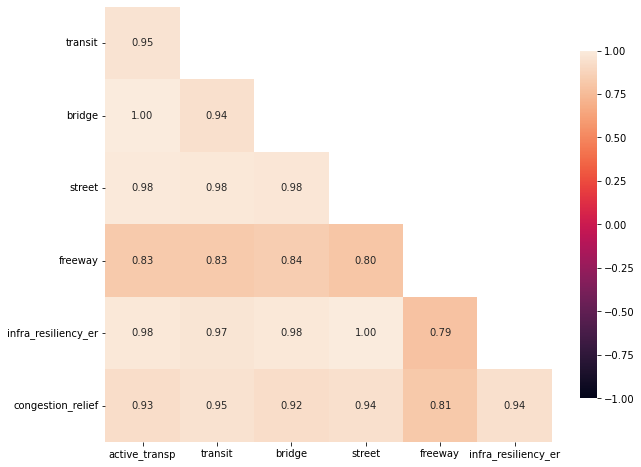

In [268]:
fig, ax = plt.subplots(figsize=(10, 8))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

## Word Cloud

In [195]:
# !pip install nltk
# ! pip install textblob
# ! pip install wordcloud

In [196]:
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [197]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [198]:
import re

In [199]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
df3= none[['type_of_work']]

In [201]:
text = df3.squeeze().tolist() 

In [202]:
text

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [203]:
text = ' '.join(text).lower()

In [204]:
#swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]

In [205]:
def clean_string(text):
    text = re.sub(r"[^A-z\s]", "", text)
    swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
    swords.append('tc')
    swords.append('install')
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords]

    return cleaned_list_of_words

In [206]:
clean_text = clean_string(text)

In [207]:
clean_text

['add',
 'one',
 'mixedflow',
 'lane',
 'direction',
 'port',
 'truck',
 'reduction',
 'program',
 'bluff',
 'face',
 'stabilization',
 'sf',
 'bay',
 'area',
 'regionwide',
 'implement',
 'innovative',
 'projects',
 'initiatives',
 'ingrain',
 'walking',
 'rolling',
 'school',
 'culture',
 'study',
 'oncampus',
 'parking',
 'pricing',
 'sf',
 'bay',
 'area',
 'regionwide',
 'planning',
 'implementation',
 'various',
 'multimodal',
 'eliminate',
 'curve',
 'way',
 'stop',
 'eastbound',
 'left',
 'turn',
 'lane',
 'dynamic',
 'variable',
 'speed',
 'warning',
 'signs',
 'locations',
 'downhill',
 'construction',
 'traffic',
 'count',
 'program',
 'scour',
 'protection',
 'grade',
 'separation',
 'harney',
 'lane',
 'uprtc',
 'spare',
 'air',
 'program',
 'ongoing',
 'regional',
 'seasonal',
 'public',
 'outreach',
 'traffic',
 'signs',
 'flashing',
 'beacons',
 'markings',
 'landscaping',
 'enhancements',
 'phase',
 'inst',
 'spd',
 'feedback',
 'signs',
 'lts',
 'warning',
 'signtc',
 

In [208]:
df4 = df3.squeeze()

In [209]:
df4 = df4.to_list()

In [210]:
df4

['Add One Mixed-flow Lane In Each Direction',
 'Port Truck Reduction Program',
 'Bluff Face Stabilization',
 'Sf Bay Area: Regionwide: Implement Innovative Projects & Initiatives That',
 'Ingrain Walking & Rolling Into School Culture (tc)',
 'Study On-campus Parking Pricing',
 'Sf Bay Area: Regionwide: Planning And Implementation Of Various Multi-modal',
 'Eliminate Curve; Install 4-way Stop; Install Eastbound Left Turn Lane And',
 'Install Dynamic Variable Speed Warning Signs At 2 Locations For Downhill',
 'Construction',
 '18/19 Traffic Count Program',
 'Scour Protection (tc)',
 'Grade Separation ,harney Lane At Upr.(tc)',
 'The Spare The Air Program Is An Ongoing Regional, Seasonal Public Outreach',
 'Install Traffic Signs, Flashing Beacons And Markings (tc)',
 'Landscaping & Enhancements - Phase 2',
 'Inst. Spd. Feedback Signs, Lts, Warning Sign(tc)',
 'Purchase Cng Refuse Truck',
 'Construct Left Turn Channelizations Along South Union Avenue.',
 'Ppm (rstp) Phase 3, 2019 (tc)',
 '

In [211]:
#need a cleaned list of strings, not a list of words

In [212]:
# cleaned_work_list = [clean_string(row)for row in df4] 

In [213]:
# cleaned_work_list

## Word Clouds

In [214]:
def word_cloud_gen(df):
    test = ' '.join(df).lower() 
    wordcloud2 = WordCloud(width=800, height=400, stopwords = STOPWORDS,
                      collocations=True, background_color='white', ).generate(test)
    
    plt.figure( figsize=(12,6))
    plt.imshow(wordcloud2, interpolation='bilInear')
    plt.axis('off')
    plt.show()

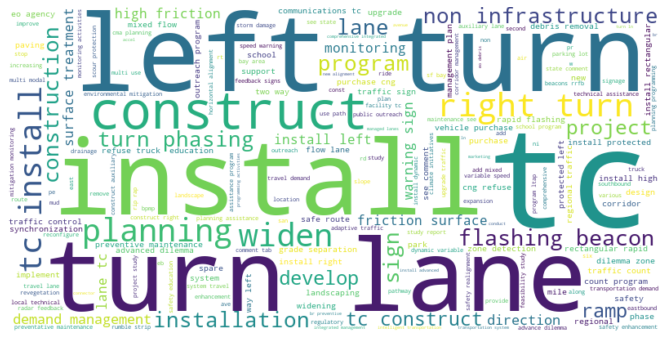

In [215]:
#Before cleaning
word_cloud_gen(df4)

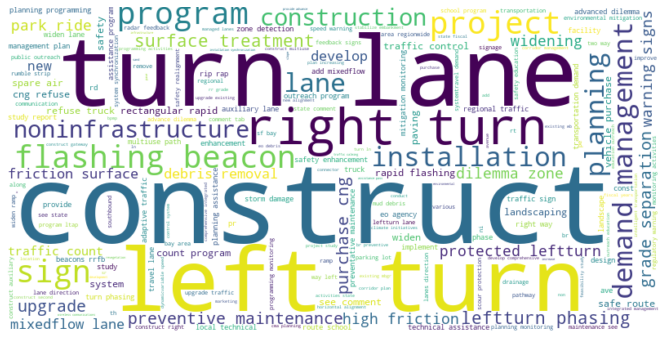

In [216]:
#after cleaning
word_cloud_gen(clean_text)

using the word clouds I added the following words to the categories: 
- trail
- restoration
- roundabout 